<a href="https://colab.research.google.com/github/MAR123EREE/Laboratorio_02/blob/main/Parcial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EJERCICIO

In [22]:
# utilizado para la manipulación de directorios y rutas
import os
# Libreria para graficos
from matplotlib import pyplot

# Cálculo científico y vectorial para python
import numpy as np
# Modulo de optimizacion en scipy
#from scipy import optimize

# modulo para cargar archivos en formato MATLAB
#from scipy.io import loadmat

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dataset original

In [24]:
# Ingresar imágenes de dígitos de 28x28
input_layer_size  = 784
# 10 etiquetas, de 0 a 9 (tomar en cuenta que se asigna "0" a la etiqueta 10)
num_labels = 10
# Cargar el dataset MNIST desde Google Drive
# Importar la libreria pandas y asignarle el alias 'pd'
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Data_sets/Lab_04/mnist_train.csv', delimiter=',')

# Separar los datos de entrada (X) y las etiquetas (y)
X = data.iloc[:, 1:]  # Todas las columnas desde la segunda (datos de píxeles)
y = data.iloc[:, 0]   # La primera columna contiene las etiquetas

# Revisar si el valor 10 está en las etiquetas (no debería estar)
y[y == 10] = 0  # Si encuentras algún 10, reasígnalo como 0
m = y.size

# Mostrar los primeros datos
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
#Define una función llamada displayData que toma tres parámetros: X (los datos a mostrar), example_width (ancho de cada ejemplo) y
#figsize (tamaño de la figura).
def displayData(X, example_width=None, figsize=(10, 10)):
    """
    Muestra datos 2D almacenados en X en una cuadrícula apropiada.
    """
    # Calcula filas, columnas
    #Verifica la dimensionalidad de X y ajusta m (número de ejemplos)
    #y n (número de características). Si X es un vector, lo convierte en una matriz bidimensional.
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promocionar a una matriz bidimensional
    else:
        raise IndexError('La entrada X debe ser 1 o 2 dimensinal.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n / example_width

    # Calcula el numero de elementos a mostrar
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = pyplot.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        ax.imshow(X[i].reshape(example_width, example_width, order='F'),
                  cmap='Greys', extent=[0, 1, 0, 1])
        ax.axis('off')

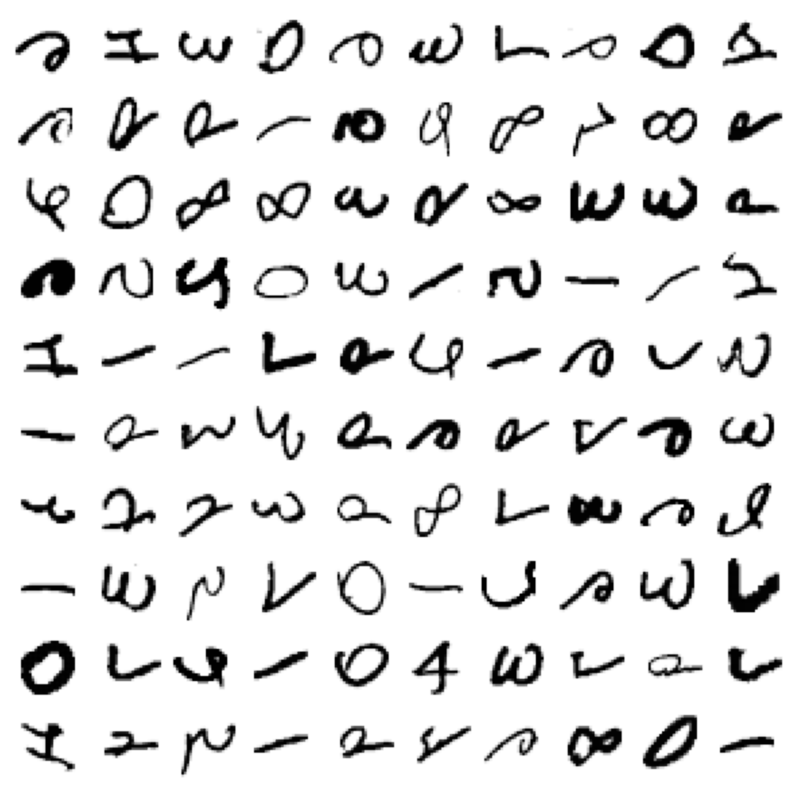

In [28]:
# Selecciona aleatoriamente 100 puntos de datos para mostrar
rand_indices = np.random.choice(m, 100, replace=False)
sel = X.iloc[rand_indices, :].values # Use .iloc to select rows and columns by integer location

displayData(sel)

DATASET SINTÉTICO

ID de la Imagen: Una columna que contenga un identificador único para cada imagen. Esto puede ser útil para rastrear y referenciar imágenes específicas.

Fecha de Creación: Una columna que registre la fecha y hora en que la imagen fue creada o añadida al dataset. Esto puede ser útil para análisis temporales o para mantener un registro histórico.

Fuente del Dato: Una columna que indique la fuente de la imagen, como el dispositivo o la persona que la creó. Esto puede ser útil para análisis de calidad o para entender la variabilidad en los datos.

Agragando tres filas y ahora son 787 + 1, seían 785

In [25]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Crear un DataFrame de ejemplo con las columnas originales de MNIST
data = pd.DataFrame(np.random.randint(0, 256, size=(100, 784)), columns=[f'Pixel{i+1}' for i in range(784)])
data['Label'] = np.random.randint(0, 10, size=(100,))

# Añadir la columna 'ImageID'
data['ImageID'] = [f'{i:05d}' for i in range(len(data))]

# Añadir la columna 'CreationDate'
data['CreationDate'] = [datetime.now().strftime('%Y-%m-%d %H:%M:%S') for _ in range(len(data))]

# Añadir la columna 'DataSource'
data['DataSource'] = np.random.choice(['Scanner1', 'UserA', 'UserB'], size=(100,))

# Reordenar las columnas para que las nuevas estén al principio
mnist_data = data[['ImageID', 'CreationDate', 'DataSource', 'Label'] + [f'Pixel{i+1}' for i in range(784)]]

# Duplicar el DataFrame existente
duplicated_data = mnist_data.copy()

# Modificar el 'ImageID' para evitar duplicados, añadiendo un prefijo "D-" para los duplicados
duplicated_data['ImageID'] = ['D-' + image_id for image_id in duplicated_data['ImageID']]

# Modificar 'CreationDate' sumando minutos aleatorios para simular una nueva creación
duplicated_data['CreationDate'] = pd.to_datetime(duplicated_data['CreationDate']) + pd.to_timedelta(np.random.randint(1, 60, size=(len(duplicated_data))), unit='m')
duplicated_data['CreationDate'] = duplicated_data['CreationDate'].dt.strftime('%Y-%m-%d %H:%M:%S')

# Modificar 'DataSource' aleatoriamente para simular otra fuente de origen (puede quedar igual en algunos casos)
duplicated_data['DataSource'] = np.random.choice(['Scanner1', 'UserA', 'UserB'], size=(100,))

# Añadir atributos adicionales relacionados con el dataset:
# Columna de texto: 'ProcessingMethod' que describe el método usado
duplicated_data['ProcessingMethod'] = np.random.choice(['MethodA', 'MethodB', 'MethodC'], size=(len(duplicated_data)))

# Columna booleana: 'IsModified' para indicar si la imagen ha sido procesada de alguna manera
duplicated_data['IsModified'] = np.random.choice([True, False], size=(len(duplicated_data)))

# Concatenar los datos originales y duplicados
final_data = pd.concat([mnist_data, duplicated_data], ignore_index=True)

# Reordenar las columnas para que las nuevas estén al principio
final_data = final_data[['ImageID', 'CreationDate', 'DataSource', 'ProcessingMethod', 'IsModified', 'Label'] + [f'Pixel{i+1}' for i in range(784)]]

# Guardar el dataset extendido
final_data.to_csv('mnist_extended_synthetic.csv', index=False)

print("Dataset duplicado y extendido creado exitosamente.")

Dataset duplicado y extendido creado exitosamente.


In [29]:
#Define una función llamada displayData que toma tres parámetros: X (los datos a mostrar), example_width (ancho de cada ejemplo) y
#figsize (tamaño de la figura).
def displayData(X, example_width=None, figsize=(10, 10)):
    """
    Muestra datos 2D almacenados en X en una cuadrícula apropiada.
    """
    # Calcula filas, columnas
    #Verifica la dimensionalidad de X y ajusta m (número de ejemplos)
    #y n (número de características). Si X es un vector, lo convierte en una matriz bidimensional.
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promocionar a una matriz bidimensional
    else:
        raise IndexError('La entrada X debe ser 1 o 2 dimensinal.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n / example_width

    # Calcula el numero de elementos a mostrar
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = pyplot.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        ax.imshow(X[i].reshape(example_width, example_width, order='F'),
                  cmap='Greys', extent=[0, 1, 0, 1])
        ax.axis('off')

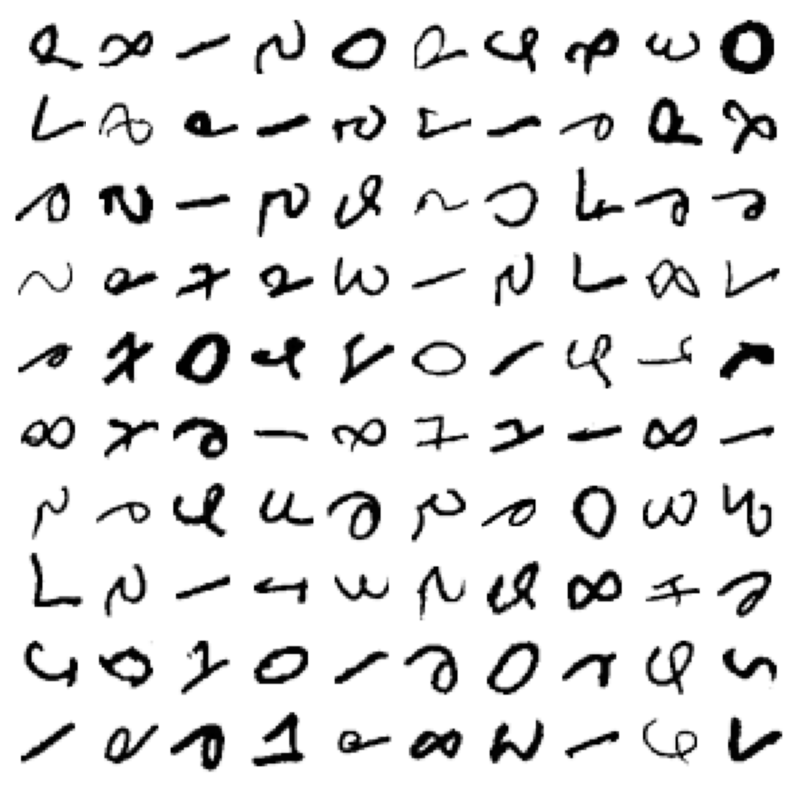

In [30]:
# Selecciona aleatoriamente 100 puntos de datos para mostrar
rand_indices = np.random.choice(m, 100, replace=False)
sel = X.iloc[rand_indices, :].values # Use .iloc to select rows and columns by integer location

displayData(sel)